<a href="https://colab.research.google.com/github/akhil-1205/fm_project/blob/main/FM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FM Project:

Creating a common function that will run a linear regression and find the beta unlevered for a model with just a simple call and also print the regression statistics. Will further use this function for the second part where we find the beta unlevered for comparable companies and calculate beta for the specified company too.

#Group 16:
Anubhav Saha Roy : 2022B3AA0877H
Sashank Sivakumar : 2022B3AA1303H
Akhil Mohammad : 2022B3A70360H
Aavula Kaartavaraya yadav : 2022B3A70290H
Sai Poorna Parikshit Dashetwar : 2022B3A70492H
Vishnu Vardhan: 2022B3A70643H

#PART 1:
Finding beta levered using the linear regression model. And then using the CAPM model to find out the cost of equity.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
def beta(ticker):

  #collecting historical data
  company_data = yf.download(ticker, start='2019-01-03', end='2023-12-31', progress=False)

  #collecting bse sensex as market index data
  market_index_data = yf.download('^BSESN', start='2019-01-03', end='2023-12-31', progress=False)  # BSE Sensex as market index

  #calculating monthly returns for both
  company_returns = np.log(company_data['Adj Close'] / company_data['Adj Close'].shift(1)).dropna()
  market_returns = np.log(market_index_data['Adj Close'] / market_index_data['Adj Close'].shift(1)).dropna()

  #code to ensure indices are aligned
  company_returns = company_returns.reindex(market_returns.index).dropna()

  #regression model
  X = sm.add_constant(market_returns)
  model = sm.OLS(company_returns, X).fit()
  beta = model.params[1]

  #calculating cost of equity using CAPM model
  risk_free_rate = 0.05341 #average YTM of T-bills for five years
  market_return = 0.137 #average of BSE sensex

  cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)

  #plotting graph
  plt.scatter(market_returns, company_returns, alpha=0.6, label='Data Points')
  plt.plot(market_returns, model.predict(X), color='red', label='Regression Line')
  plt.title('Regression Analysis')
  plt.xlabel('Market Returns')
  plt.ylabel('Company Returns')
  plt.legend()
  plt.show()

  print("Beta levered: ", beta)
  print("Cost of equity: ", cost_of_equity)
  print("\n\n")
  print(model.summary())

  return beta

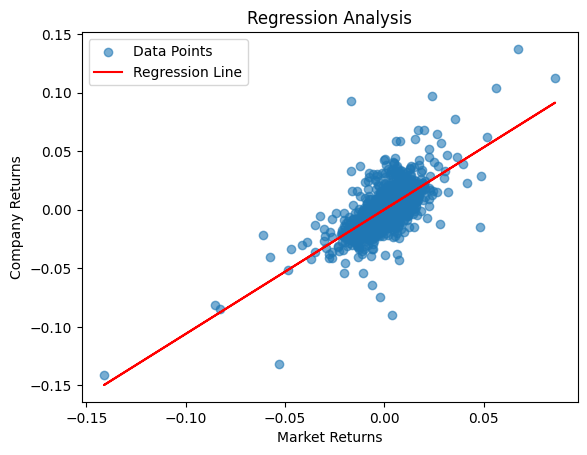

Beta levered:  1.0620504609470611
Cost of equity:  0.14218679803056483



                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     1080.
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          2.25e-170
Time:                        15:47:56   Log-Likelihood:                 3504.1
No. Observations:                1228   AIC:                            -7004.
Df Residuals:                    1226   BIC:                            -6994.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

1.0620504609470611

In [ ]:
beta("RELIANCE.NS")

# **BETA OF RELIANCE IS 1.0621 AT 5% CONFIDENCE LEVEL**

#PART 2: Calculating using bottom-up method

Calling the beta function on 6 companies to find its beta unlevered, then will unlever the data after using the debt to equity ratios retrieved from the financial reports. Average of unlevered betas will give beta unlevered of Reliance. Then we will relever it again.


In [ ]:
#function to unlever beta
def unlever_beta(beta, debt_to_equity_ratio, tax_rate):
  return beta/(1 + (1 - tax_rate)*debt_to_equity_ratio)

In [ ]:
betas_unlevered = []

#3M India

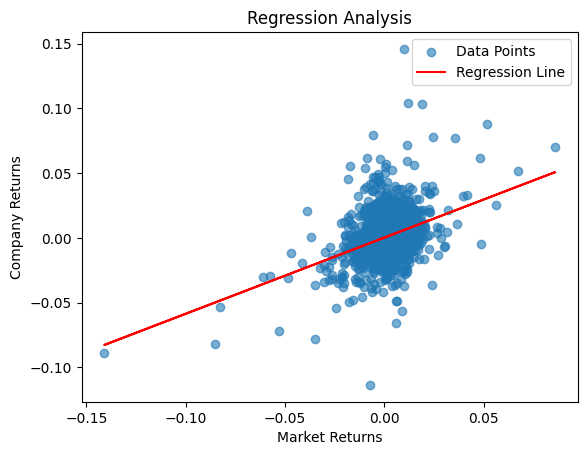

Beta levered:  0.5886178285279526
Cost of equity:  0.10261256428665157



                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           1.04e-41
Time:                        15:47:57   Log-Likelihood:                 3185.9
No. Observations:                1228   AIC:                            -6368.
Df Residuals:                    1226   BIC:                            -6357.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [ ]:
betas_unlevered.append(unlever_beta(beta("3MINDIA.NS"), 0.01594508016, 0.25))

# - Piramal Enterprises Limited

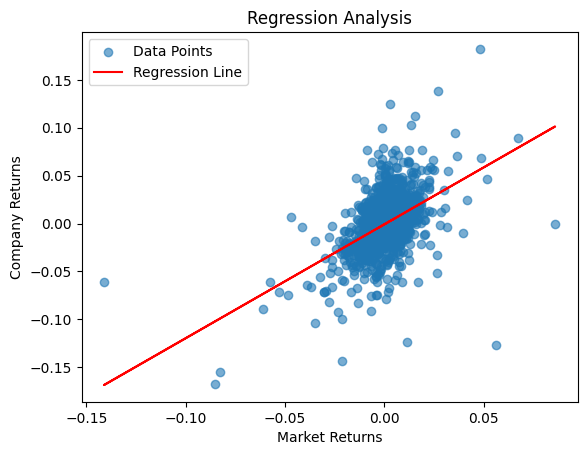

Beta levered:  1.1883276837602745
Cost of equity:  0.15274231108552136



                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     414.4
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           1.39e-79
Time:                        15:47:57   Log-Likelihood:                 2778.0
No. Observations:                1228   AIC:                            -5552.
Df Residuals:                    1226   BIC:                            -5542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [ ]:
betas_unlevered.append(unlever_beta(beta("PEL.NS"), 1.594086174, 0.25))

# Adani Enterprises Limited

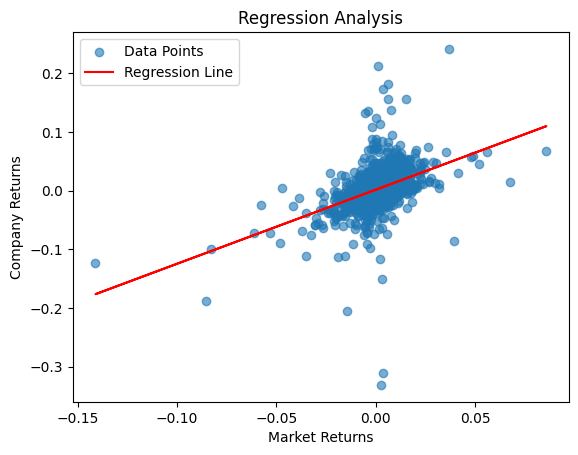

Beta levered:  1.262894107753537
Cost of equity:  0.15897531846711815



                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     306.1
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           2.36e-61
Time:                        15:47:58   Log-Likelihood:                 2517.3
No. Observations:                1228   AIC:                            -5031.
Df Residuals:                    1226   BIC:                            -5020.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [ ]:
betas_unlevered.append(unlever_beta(beta("ADANIENT.NS"), 1.603810292, 0.25))

#  Mold-Tek Technologies Limited

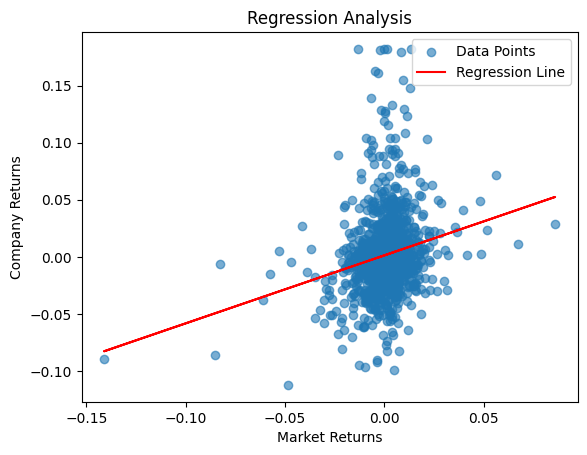

In [ ]:
betas_unlevered.append(unlever_beta(beta("MOLDTECH.NS"), 0.07063026149, 0.25))

#  Zuari Industries Limited

Beta levered:  0.5958834826965498
Cost of equity:  0.1032199003186046



                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     58.91
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           3.35e-14
Time:                        15:47:59   Log-Likelihood:                 2428.0
No. Observations:                1228   AIC:                            -4852.
Df Residuals:                    1226   BIC:                            -4842.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

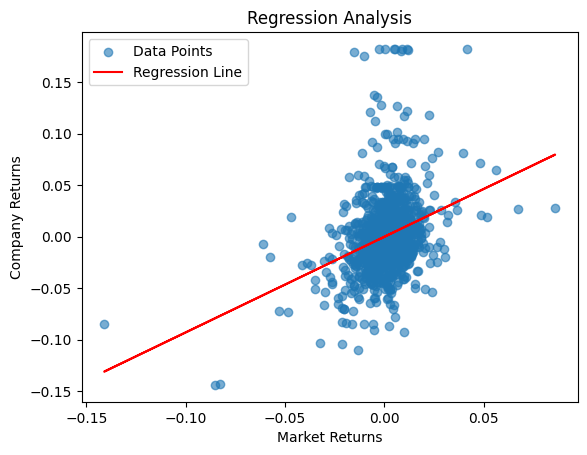

Beta levered:  0.9283942970531963
Cost of equity:  0.1310144792906767



                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     144.9
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           1.26e-31
Time:                        15:47:59   Log-Likelihood:                 2436.1
No. Observations:                1228   AIC:                            -4868.
Df Residuals:                    1226   BIC:                            -4858.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [ ]:
betas_unlevered.append(unlever_beta(beta("ZUARIIND.NS"), 1.098803177, 0.25))

# GODREJ INDIA

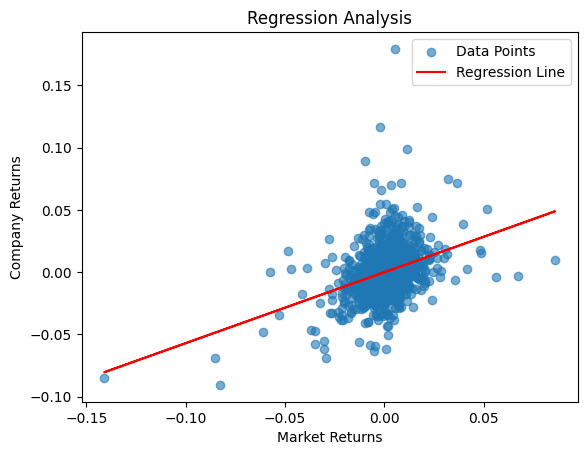

Beta levered:  0.5699143347194362
Cost of equity:  0.10104913923919767



                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     187.7
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           7.55e-40
Time:                        15:48:00   Log-Likelihood:                 3194.0
No. Observations:                1228   AIC:                            -6384.
Df Residuals:                    1226   BIC:                            -6374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [ ]:
betas_unlevered.append(unlever_beta(beta("GODREJIND.NS"), 2.460136669, 0.25))

In [ ]:
#list of all unlevered betas
betas_unlevered

[0.5816618449699086,
 0.5412401289638441,
 0.5732980831493898,
 0.5659059203469182,
 0.5089595331011835,
 0.20031416596375223]

In [ ]:
#average of unlevered betas = reliance beta unlevered
reliance_unlevered = np.mean(betas_unlevered)

In [ ]:
reliance_unlevered

0.4952299460824994

#Relever Beta for Targetted Company:

In [ ]:
tax=0.25
d_by_e=0.4081261348
beta_relevered = reliance_unlevered * (1 + (1 - tax) * d_by_e)

beta_relevered

0.6468171588813965